IMPORTING NECESSARY INFO

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
file_path = "medlr_assignment_dataset.csv"
df = pd.read_csv(file_path)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1448 non-null   object 
 1   name                   1448 non-null   object 
 2   source                 1448 non-null   object 
 3   prescription_required  1448 non-null   bool   
 4   retail_price           1367 non-null   float64
 5   discounted_price       1384 non-null   float64
 6   manufacturer           1446 non-null   object 
 7   quantity               1184 non-null   object 
 8   packaging_form         931 non-null    object 
 9   salts                  1389 non-null   object 
dtypes: bool(1), float64(2), object(7)
memory usage: 103.4+ KB


In [7]:
df.head()

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts
0,source_6-75716,Dolo 1gm Tablet,source_6,False,45.58,40.11,micro labs,10 Tablet(s) in Strip,STRIP,Paracetamol / Acetaminophen(1.0 G)
1,source_2-39579,Dolo 1000mg Infusion,source_2,True,268.00,219.76,micro labs ltd,NaN,NaN,Paracetamol/Acetaminophen 1000mg
2,source_7-90343,Dolo 1000mg Tablet,source_7,False,45.58,35.10,micro labs ltd,10.0 tablets in 1 strip,NaN,Paracetamol (1000mg)
3,source_1-65076,Dolo 1000 mg Tablet 10's,source_1,True,45.50,40.00,micro labs ltd,10,Strip | Tablet,PARACETAMOL-1000MG
4,source_1-65077,Dolo 120 mg Suspension 60 ml,source_1,False,40.00,35.20,micro labs ltd,60,Bottle | Suspension,PARACETAMOL-120MG


Task 1

In [8]:
# Check for missing values
df.isna().sum()

id                         0
name                       0
source                     0
prescription_required      0
retail_price              81
discounted_price          64
manufacturer               2
quantity                 264
packaging_form           517
salts                     59
dtype: int64

In [9]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [10]:
numerical_columns = ["retail_price", "discounted_price"]


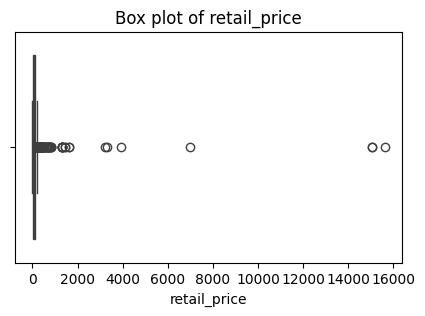

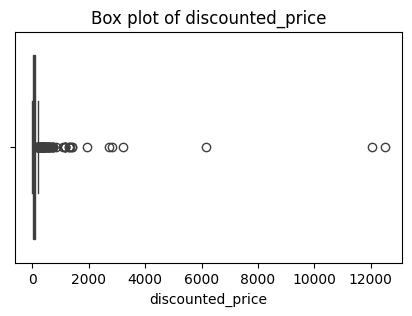

In [11]:
#checking trends in numerical values
for column in numerical_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()


In [ ]:
#filling with median value
for column in numerical_columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)
    
df['quantity'].fillna('Unknown', inplace=True)



In [13]:
df.isna().sum()

id                         0
name                       0
source                     0
prescription_required      0
retail_price               0
discounted_price           0
manufacturer               2
quantity                   0
packaging_form           517
salts                     59
dtype: int64

In [ ]:
df['manufacturer'].fillna('Unknown', inplace=True)
df['packaging_form'].fillna('Unknown', inplace=True)
df['salts'].fillna('Unknown', inplace=True)

In [15]:
df.isna().sum()

id                       0
name                     0
source                   0
prescription_required    0
retail_price             0
discounted_price         0
manufacturer             0
quantity                 0
packaging_form           0
salts                    0
dtype: int64

In [16]:
df.head()

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts
0,source_6-75716,Dolo 1gm Tablet,source_6,False,45.58,40.11,micro labs,10 Tablet(s) in Strip,STRIP,Paracetamol / Acetaminophen(1.0 G)
1,source_2-39579,Dolo 1000mg Infusion,source_2,True,268.00,219.76,micro labs ltd,Unknown,Unknown,Paracetamol/Acetaminophen 1000mg
2,source_7-90343,Dolo 1000mg Tablet,source_7,False,45.58,35.10,micro labs ltd,10.0 tablets in 1 strip,Unknown,Paracetamol (1000mg)
3,source_1-65076,Dolo 1000 mg Tablet 10's,source_1,True,45.50,40.00,micro labs ltd,10,Strip | Tablet,PARACETAMOL-1000MG
4,source_1-65077,Dolo 120 mg Suspension 60 ml,source_1,False,40.00,35.20,micro labs ltd,60,Bottle | Suspension,PARACETAMOL-120MG


In [17]:
import re

# Function to clean text
def clean_text(text):
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip()

df['name'] = df['name'].apply(clean_text)
df['manufacturer'] = df['manufacturer'].apply(clean_text)
df['quantity'] = df['quantity'].apply(clean_text)
df['packaging_form'] = df['packaging_form'].apply(clean_text)
df['salts'] = df['salts'].apply(clean_text)

# Display the cleaned dataframe
df.head(10)

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts
0,source_6-75716,Dolo 1gm Tablet,source_6,False,45.58,40.11,micro labs,10 Tablets in Strip,STRIP,Paracetamol Acetaminophen10 G
1,source_2-39579,Dolo 1000mg Infusion,source_2,True,268.00,219.76,micro labs ltd,Unknown,Unknown,ParacetamolAcetaminophen 1000mg
2,source_7-90343,Dolo 1000mg Tablet,source_7,False,45.58,35.10,micro labs ltd,100 tablets in 1 strip,Unknown,Paracetamol 1000mg
3,source_1-65076,Dolo 1000 mg Tablet 10s,source_1,True,45.50,40.00,micro labs ltd,10,Strip Tablet,PARACETAMOL1000MG
4,source_1-65077,Dolo 120 mg Suspension 60 ml,source_1,False,40.00,35.20,micro labs ltd,60,Bottle Suspension,PARACETAMOL120MG
5,source_6-75717,Dolo 120mg Suspension 60ml,source_6,False,40.32,34.27,micro labs,60ml Suspension in Bottle,BOTTLE,Paracetamol Acetaminophen1200 Mg5ml
6,source_2-39580,Dolo 120 Suspension,source_2,True,34.94,28.65,micro labs ltd,Unknown,Unknown,ParacetamolAcetaminophen 120mg5ml
7,source_3-2151,DOLO 156MG SYP 60ML,source_3,False,51.00,43.35,micro labs ltd,60,Bottle SYRUP,PARACETAMOLACETAMINOPHEN 15625 MG 5ML
8,source_7-90345,Dolo 15625mg Suspension,source_7,False,56.00,49.60,micro labs ltd,600 ml in 1 bottle,Unknown,Paracetamol 15625mg5ml
9,source_1-65079,Dolo 15625 mg Syrup 60 ml,source_1,False,56.00,49.30,micro labs ltd,60,Bottle Syrup,PARACETAMOL15625MG


In [18]:
# Updated functions to handle None values safely
#Used AI tools
def clean_medicine_name(name):
    if pd.isna(name): return None  # Handle missing values
    name = name.lower().strip()
    name = re.sub(r'[^a-z0-9\s]', '', name)
    name = re.sub(r'\s+', ' ', name)
    return name

def clean_manufacturer(name):
    if pd.isna(name): return None
    name = name.lower().strip()
    name = re.sub(r'ltd|limited', '', name)
    name = re.sub(r'\s+', ' ', name).strip()
    return name

def standardize_dosage(dosage):
    if pd.isna(dosage): return None
    dosage = dosage.lower().strip()
    dosage = dosage.replace('gm', '000mg')
    dosage = re.sub(r'(\d+)\s*mg', r'\1mg', dosage)
    return dosage

def clean_quantity(quantity):
    if pd.isna(quantity) or quantity.lower() == "unknown": return None
    quantity = quantity.lower().strip()
    quantity = re.sub(r'[^a-z0-9\s]', '', quantity)
    quantity = re.sub(r'\s+', ' ', quantity)
    return quantity

def clean_packaging(packaging):
    if pd.isna(packaging) or packaging.lower() == "unknown": return None
    packaging = packaging.lower().strip()
    packaging = re.sub(r'[^a-z0-9\s]', '', packaging)
    packaging = re.sub(r'\s+', ' ', packaging)
    return packaging

# Reapply the cleaning functions with improved handling for None values
df['name'] = df['name'].apply(clean_medicine_name)
df['manufacturer'] = df['manufacturer'].apply(clean_manufacturer)
df['quantity'] = df['quantity'].apply(clean_quantity)
df['packaging_form'] = df['packaging_form'].apply(clean_packaging)
df['salts'] = df['salts'].apply(standardize_dosage)



In [19]:
df.to_csv("Cleaned_data.csv",index=False)

In [20]:
df.head(20)

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts
0,source_6-75716,dolo 1gm tablet,source_6,False,45.58,40.11,micro labs,10 tablets in strip,strip,paracetamol acetaminophen10 g
1,source_2-39579,dolo 1000mg infusion,source_2,True,268.00,219.76,micro labs,None,None,paracetamolacetaminophen 1000mg
2,source_7-90343,dolo 1000mg tablet,source_7,False,45.58,35.10,micro labs,100 tablets in 1 strip,None,paracetamol 1000mg
3,source_1-65076,dolo 1000 mg tablet 10s,source_1,True,45.50,40.00,micro labs,10,strip tablet,paracetamol1000mg
4,source_1-65077,dolo 120 mg suspension 60 ml,source_1,False,40.00,35.20,micro labs,60,bottle suspension,paracetamol120mg
5,source_6-75717,dolo 120mg suspension 60ml,source_6,False,40.32,34.27,micro labs,60ml suspension in bottle,bottle,paracetamol acetaminophen1200mg5ml
6,source_2-39580,dolo 120 suspension,source_2,True,34.94,28.65,micro labs,None,None,paracetamolacetaminophen 120mg5ml
7,source_3-2151,dolo 156mg syp 60ml,source_3,False,51.00,43.35,micro labs,60,bottle syrup,paracetamolacetaminophen 15625mg 5ml
8,source_7-90345,dolo 15625mg suspension,source_7,False,56.00,49.60,micro labs,600 ml in 1 bottle,None,paracetamol 15625mg5ml
9,source_1-65079,dolo 15625 mg syrup 60 ml,source_1,False,56.00,49.30,micro labs,60,bottle syrup,paracetamol15625mg


Data Cleaning Done

We dont need to find and remove outliers since it is a medicine related data so valuable information can be there . Most Expensive and Cheapest Doesnt matter in this case.
1) Missing vakues filled with median in numerical columns
2) Rest of categorical columns are filled with 'Unknown'
3) String manupulation using Ai tools is done to ensure clean and aligned text

Task 2

Used Dosage as a primary classification criteria as it can be a good parameter in which we can classify th medicines
Example: Amoxicillin 250mg vs. Amoxicillin 500mg → Sub-clusters under the same main group.

Used 10 clusters as a default value

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import re

# Function to extract dosage from salts
def extract_dosage(salts):
    dosages = re.findall(r'\d+', salts)
    return ' '.join(dosages) if dosages else '0'

# Apply the function to extract dosage
df['dosage'] = df['salts'].apply(extract_dosage)

# Convert dosage to TF-IDF vectors
vectorizer = TfidfVectorizer()
X_dosage = vectorizer.fit_transform(df['dosage'])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
df['dosage_cluster'] = kmeans.fit_predict(X_dosage)



In [22]:
df.to_csv("clustered_data.csv",index=False)

In [23]:
# Display the clustered data
df[['name', 'salts', 'dosage', 'dosage_cluster']].head(20)

,name,salts,dosage,dosage_cluster
0,dolo 1gm tablet,paracetamol acetaminophen10 g,10,2
1,dolo 1000mg infusion,paracetamolacetaminophen 1000mg,1000,1
2,dolo 1000mg tablet,paracetamol 1000mg,1000,1
3,dolo 1000 mg tablet 10s,paracetamol1000mg,1000,1
4,dolo 120 mg suspension 60 ml,paracetamol120mg,120,2
5,dolo 120mg suspension 60ml,paracetamol acetaminophen1200mg5ml,1200 5,2
6,dolo 120 suspension,paracetamolacetaminophen 120mg5ml,120 5,2
7,dolo 156mg syp 60ml,paracetamolacetaminophen 15625mg 5ml,15625 5,2
8,dolo 15625mg suspension,paracetamol 15625mg5ml,15625 5,2
9,dolo 15625 mg syrup 60 ml,paracetamol15625mg,15625,2


C:\Users\anshu\AppData\Local\Temp\ipykernel_44000\2448516794.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dosage_cluster', data=df, palette='viridis')


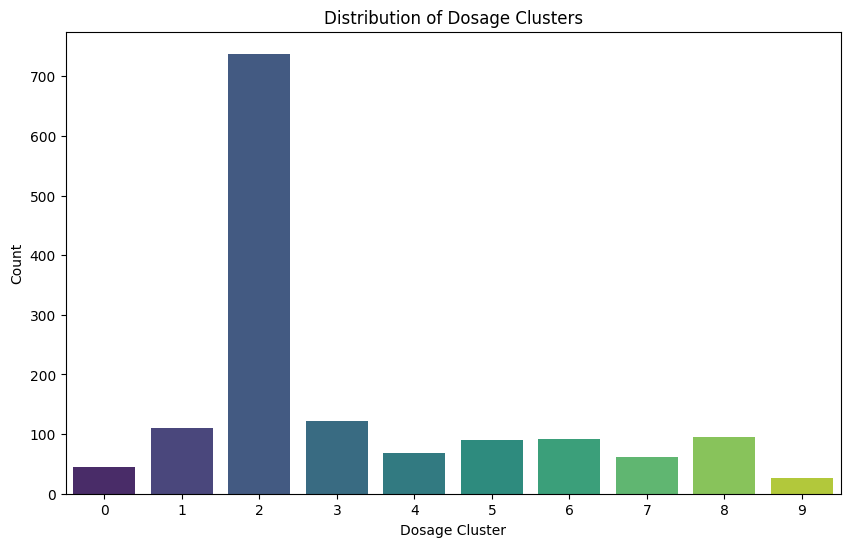

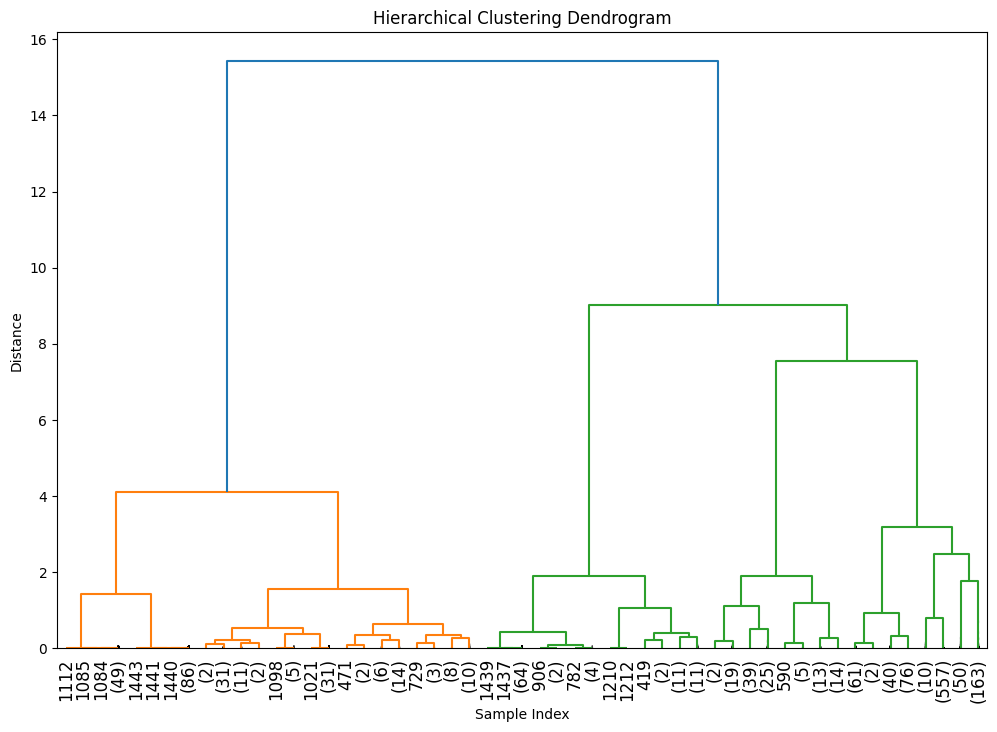

In [24]:

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# Perform PCA on X_dosage
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dosage.toarray())

# Plot the distribution of clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='dosage_cluster', data=df, palette='viridis')
plt.title('Distribution of Dosage Clusters')
plt.xlabel('Dosage Cluster')
plt.ylabel('Count')
plt.show()

# Generate the linkage matrix
Z = linkage(X_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='level', p=5, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Task 3

In [25]:
# Randomly select sample data
sample_df = df.sample(n=40, random_state=42).copy()

sample_df.drop(columns=['dosage_cluster'], inplace=True)

sample_df.head(10)


,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts,dosage
1023,source_6-280452,zerodol spas strip of 10 tablets,source_6,True,159.10,140.01,ipca laboratories,10 tablets in strip,strip,drotaverine800mg aceclofenac1000mg,800 1000
381,source_2-39675,dolomec dp 25mg injection,source_2,True,14.40,11.81,mcw healthcare,None,None,diclofenac 25mg,25
843,source_6-76042,dolovis sp 10032515 mg tablet 10,source_6,True,108.00,108.00,inovis healthcare pvt,10 tablets in strip,strip,aceclofenac1000mg serratiopeptidase150mg parac...,1000 150 3250
427,source_1-65185,dolomine 650 mg tablet 10s,source_1,False,18.00,15.84,cassel research laboratories pvt,10,strip tablet,paracetamol650mg,650
192,source_6-75799,dolodart ds suspension 60ml,source_6,False,44.35,44.35,juggat pharma,60ml suspension in bottle,bottle,paracetamol acetaminophen2500mg5ml,2500 5
184,source_7-90395,dolocrat 100 mg500 mg tablet,source_7,True,33.00,32.00,syncom formulations india,100 tablets in 1 strip,None,aceclofenac 100mg paracetamol 500mg,100 500
324,source_7-90457,dolokind aqua 75mg injection,source_7,True,36.17,25.38,mankind pharma,10 ml in 1 ampoule,None,diclofenac 75mg,75
49,source_1-65089,dolo oral drops 15 ml,source_1,False,30.00,26.40,micro labs,15,bottle oral drops,paracetamol100mg,100
493,source_1-65212,dolonex dt 20 mg tablet 15s,source_1,True,237.00,208.60,pfizer,15,strip tablet,piroxicam20mg,20
259,source_1-65145,doloforce injection 4 x 2 ml,source_1,True,141.50,124.50,mankind pharma pvt,4 x 2,box injection,piroxicam40mg,40


In [26]:
# Manually add clusters
sample_df['cluster_id'] = [1, 2, 1, 3, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1]

sample_df.to_csv("bonustask1.csv", index=False)

Took a sample of 40 rows and mannually labled it and saved as bonustask1.csv

Task 4

1. Load the final clustered dataset and the manually labeled sample dataset.
2. Merge the datasets on the 'name' column to compare the clusters.
3. Calculate precision, recall, F1-score, and clustering purity to evaluate the clustering performance.
4. Save the merged dataframe for reference and print the evaluation metrics.

In [32]:
final_clustered_df = pd.read_csv("clustered_data.csv")
manual_sample_df = pd.read_csv("bonustask1.csv")

# Merge the datasets on the 'name' column to compare clusters
merged_df = pd.merge(manual_sample_df, final_clustered_df[['name', 'dosage_cluster']], on='name', how='inner')
merged_df.rename(columns={'cluster_id': 'cluster_manual', 'dosage_cluster': 'cluster_predicted'}, inplace=True)

In [33]:
# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


# Save the merged dataframe for reference
merged_df.to_csv("merged_cluster_comparison.csv", index=False)

Precision: 0.56
Recall: 0.39
F1-Score: 0.42
